# **1. Configuração do ambiente**

In [1]:
# Instale as bibliotecas necessárias
!pip install py4dstem==0.14.9 pymatgen numpy==1.26.4 --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 10.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of ncempy to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 673.2/673.2 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 74.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 79.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━

In [1]:
# Importe as bibliotecas
import py4DSTEM
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
%matplotlib inline

cupyx.jit.rawkernel is experimental. The interface can change in the future.


In [2]:
# Vincule o Google Colab ao seu Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **2. Preprocessing**



---


Trabalharemos com uma medida de nanopartículas de ouro. Crie um atalho do arquivo abaixo em seu Drive
* [scan_x64_x64.h5](https://drive.google.com/file/d/1iGiqCWr4iTX_5x7970ziKQlMx4q-6sKI/view?usp=sharing)

---



In [3]:
# Especifique o endereço do arquivo em seu Drive
path = "/content/drive/MyDrive/Colab Notebooks/"
filename = 'scan_x64_x64.h5'

In [4]:
# Crie o objeto "datacube" com a biblioteca py4DSTEM
datacube = py4DSTEM.read(path + filename)
datacube

DataCube( A 4-dimensional array of shape (64, 64, 128, 128) called 'datacube',
          with dimensions:

              Rx = [0,1,2,...] pixels
              Ry = [0,1,2,...] pixels
              Qx = [0,1,2,...] pixels
              Qy = [0,1,2,...] pixels
)

In [5]:
datacube.shape

(64, 64, 128, 128)

In [6]:
datacube.data  # Dados brutos

array([[[[ 9.11286865e+02,  8.24187866e+02,  7.15858887e+02, ...,
           8.12350952e+02,  5.30056885e+02,  1.26998389e+03],
         [ 5.22485962e+02,  1.46671997e+03,  1.15262939e+02, ...,
           1.80266968e+02,  1.13173950e+02,  1.46862915e+02],
         [ 4.11607910e+02,  4.49070923e+02,  1.07692090e+03, ...,
           3.58125977e+02,  1.10079956e+02,  1.23065796e+03],
         ...,
         [ 8.39441895e+02,  1.18266296e+03,  1.10133911e+02, ...,
           6.34968872e+02,  3.85724976e+02,  7.11788940e+02],
         [ 1.11596497e+03,  1.71753992e+03,  1.47204956e+02, ...,
           1.82311487e+03,  9.23195923e+02,  5.00349121e+01],
         [ 9.68557983e+02,  1.46924792e+03,  1.08974292e+03, ...,
           1.32430994e+03,  1.34495996e+03,  2.30135864e+02]],

        [[ 8.04286865e+02,  1.65918787e+03,  1.89885889e+03, ...,
           5.23509521e+01,  2.69056885e+02,  8.88983887e+02],
         [ 3.78485962e+02,  2.11719971e+02,  1.26526294e+03, ...,
           2.65266968e

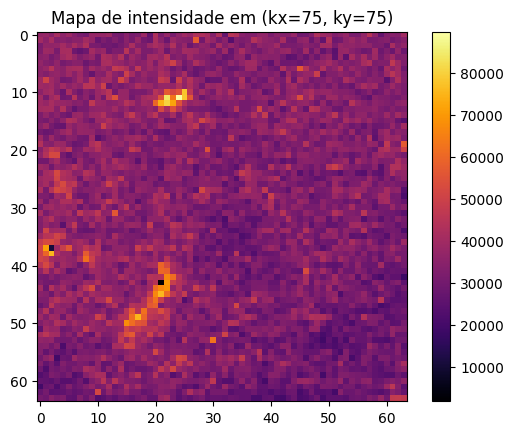

In [7]:
# Por exemplo, a intensidade no pixel (75, 75) do padrão de difração em todos os pontos da varredura
intensity_map = datacube.data[:, :, 75, 75]

plt.imshow(intensity_map, cmap='inferno')
plt.title("Mapa de intensidade em (kx=75, ky=75)")
plt.colorbar()
plt.show()


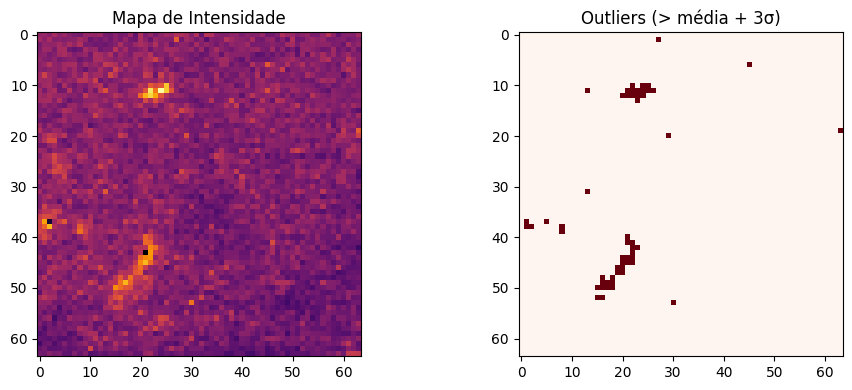

In [10]:

# Mapa de intensidade em (kx=75, ky=75)
intensity_map = datacube.data[:, :, 75, 75]

# Cálculo dos limites de outlier (método do desvio padrão)
mean = np.mean(intensity_map)
std = np.std(intensity_map)
threshold = mean + 3 * std  # pode ajustar para 2*std ou 4*std conforme sensibilidade

# Máscara de outliers
outliers = intensity_map > threshold

# Visualização
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(intensity_map, cmap='inferno')
plt.title("Mapa de Intensidade")

plt.subplot(1, 2, 2)
plt.imshow(outliers, cmap='Reds')
plt.title("Outliers (> média + 3σ)")

plt.tight_layout()
plt.show()

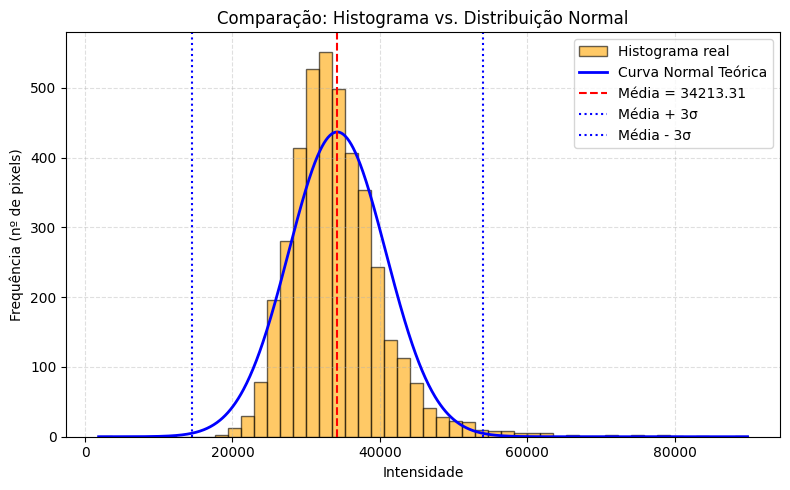

In [17]:
from scipy.stats import norm
# Extrai o mapa de intensidade no ponto (kx=75, ky=75)
intensity_map = datacube.data[:, :, 75, 75]
values = intensity_map.flatten()

# Calcula média e desvio padrão dos dados
mean = np.mean(values)
std = np.std(values)

# Gera valores para a curva normal teórica
x = np.linspace(np.min(values), np.max(values), 1000)
gaussian = norm.pdf(x, mean, std) * len(values) * (np.max(values) - np.min(values)) / 50  # Ajuste da escala

# Plot do histograma com a curva normal teórica
plt.figure(figsize=(8, 5))
plt.hist(values, bins=50, color='orange', alpha=0.6, edgecolor='black', label='Histograma real')
plt.plot(x, gaussian, color='blue', linewidth=2, label='Curva Normal Teórica')

# Linhas de média ± 3σ
plt.axvline(mean, color='red', linestyle='--', label=f'Média = {mean:.2f}')
plt.axvline(mean + 3*std, color='blue', linestyle=':', label='Média + 3σ')
plt.axvline(mean - 3*std, color='blue', linestyle=':', label='Média - 3σ')

# Personalização
plt.title("Comparação: Histograma vs. Distribuição Normal")
plt.xlabel("Intensidade")
plt.ylabel("Frequência (nº de pixels)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [20]:
# Teste de normalidade
from scipy.stats import normaltest
stat, p = normaltest(values)

print(f"Estatística do teste: {stat:.3f}")
print(f"p-valor: {p:.5f}")

if p > 0.05:
    print("✅ Os dados parecem seguir uma distribuição normal.")
else:
    print("❌ Os dados provavelmente NÃO seguem uma distribuição normal.")

Estatística do teste: 1544.033
p-valor: 0.00000
❌ Os dados provavelmente NÃO seguem uma distribuição normal.


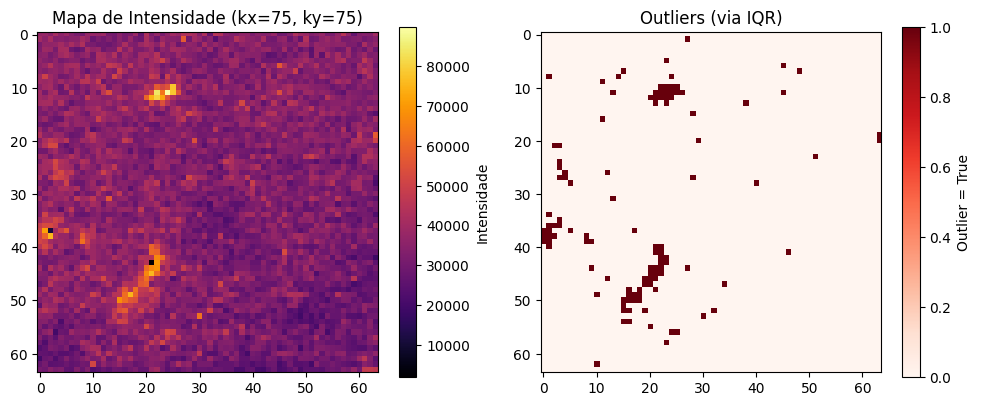

In [22]:
# Extrai o mapa de intensidade para o ponto de difração (kx=75, ky=75)
intensity_map = datacube.data[:, :, 75, 75]

# Cálculo dos quartis e IQR
q1 = np.percentile(intensity_map, 25)
q3 = np.percentile(intensity_map, 75)
iqr = q3 - q1

# Limite superior para outliers
threshold = q3 + 1.5 * iqr

# Máscara de outliers
outliers = intensity_map > threshold

# Visualização
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(intensity_map, cmap='inferno')
plt.title("Mapa de Intensidade (kx=75, ky=75)")
plt.colorbar(label="Intensidade")

plt.subplot(1, 2, 2)
plt.imshow(outliers, cmap='Reds')
plt.title("Outliers (via IQR)")
plt.colorbar(label="Outlier = True")

plt.tight_layout()
plt.show()

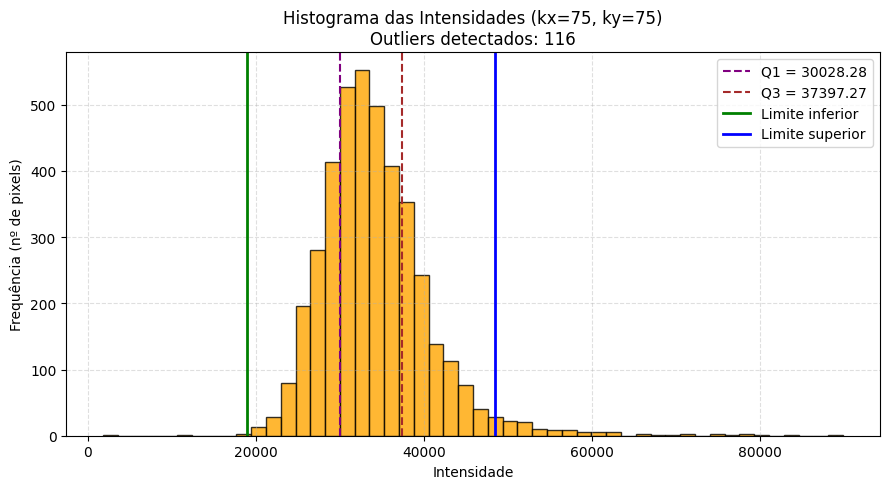

In [23]:
# Extrai o mapa de intensidade no ponto (kx=75, ky=75)
intensity_map = datacube.data[:, :, 75, 75]

# Transforma o mapa 2D em vetor 1D para análise estatística
values = intensity_map.flatten()

# Cálculo dos quartis e IQR
q1 = np.percentile(values, 25)
q3 = np.percentile(values, 75)
iqr = q3 - q1

# Limiares de outliers
threshold_low = q1 - 1.5 * iqr
threshold_high = q3 + 1.5 * iqr

# Máscara de outliers
outliers = (values < threshold_low) | (values > threshold_high)
num_outliers = np.sum(outliers)

# Plot do histograma
plt.figure(figsize=(9, 5))
plt.hist(values, bins=50, color='orange', alpha=0.8, edgecolor='black')

# Linhas verticais: Q1, Q3, e limiares
plt.axvline(q1, color='purple', linestyle='--', linewidth=1.5, label=f'Q1 = {q1:.2f}')
plt.axvline(q3, color='brown', linestyle='--', linewidth=1.5, label=f'Q3 = {q3:.2f}')
plt.axvline(threshold_low, color='green', linestyle='-', linewidth=2, label=f'Limite inferior')
plt.axvline(threshold_high, color='blue', linestyle='-', linewidth=2, label=f'Limite superior')

# Personalização
plt.title(f"Histograma das Intensidades (kx=75, ky=75)\nOutliers detectados: {num_outliers}")
plt.xlabel("Intensidade")
plt.ylabel("Frequência (nº de pixels)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

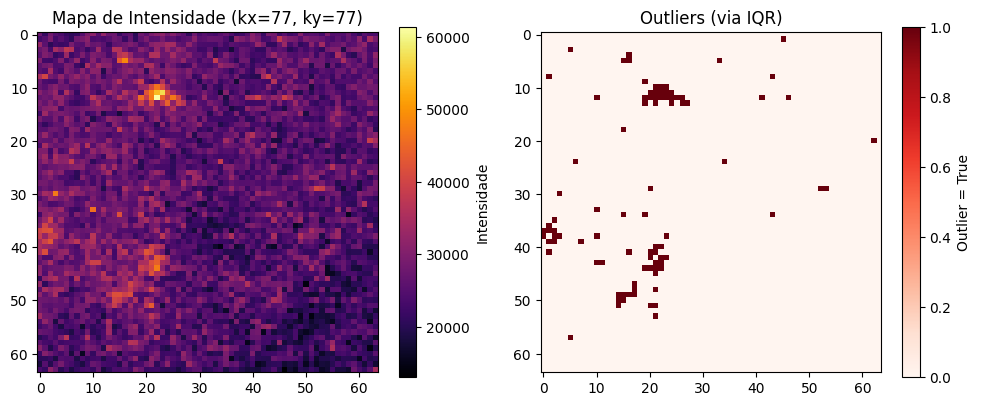

In [24]:
# Extrai o mapa de intensidade para o ponto de difração (kx=77, ky=77)
intensity_map = datacube.data[:, :, 77, 77]

# Cálculo dos quartis e IQR
q1 = np.percentile(intensity_map, 25)
q3 = np.percentile(intensity_map, 75)
iqr = q3 - q1

# Limite superior para outliers
threshold = q3 + 1.5 * iqr

# Máscara de outliers
outliers = intensity_map > threshold

# Visualização
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(intensity_map, cmap='inferno')
plt.title("Mapa de Intensidade (kx=77, ky=77)")
plt.colorbar(label="Intensidade")

plt.subplot(1, 2, 2)
plt.imshow(outliers, cmap='Reds')
plt.title("Outliers (via IQR)")
plt.colorbar(label="Outlier = True")

plt.tight_layout()
plt.show()

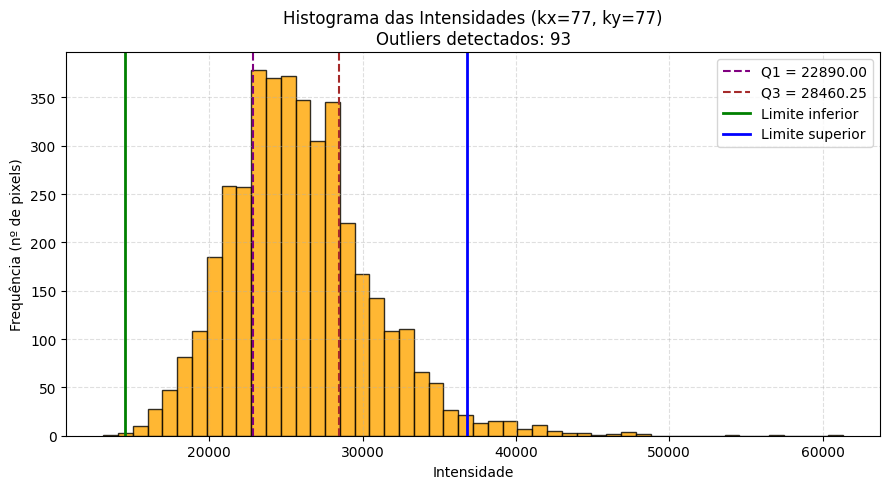

In [25]:
# Extrai o mapa de intensidade no ponto (kx=77, ky=77)
intensity_map = datacube.data[:, :, 77, 77]

# Transforma o mapa 2D em vetor 1D para análise estatística
values = intensity_map.flatten()

# Cálculo dos quartis e IQR
q1 = np.percentile(values, 25)
q3 = np.percentile(values, 75)
iqr = q3 - q1

# Limiares de outliers
threshold_low = q1 - 1.5 * iqr
threshold_high = q3 + 1.5 * iqr

# Máscara de outliers
outliers = (values < threshold_low) | (values > threshold_high)
num_outliers = np.sum(outliers)

# Plot do histograma
plt.figure(figsize=(9, 5))
plt.hist(values, bins=50, color='orange', alpha=0.8, edgecolor='black')

# Linhas verticais: Q1, Q3, e limiares
plt.axvline(q1, color='purple', linestyle='--', linewidth=1.5, label=f'Q1 = {q1:.2f}')
plt.axvline(q3, color='brown', linestyle='--', linewidth=1.5, label=f'Q3 = {q3:.2f}')
plt.axvline(threshold_low, color='green', linestyle='-', linewidth=2, label=f'Limite inferior')
plt.axvline(threshold_high, color='blue', linestyle='-', linewidth=2, label=f'Limite superior')

# Personalização
plt.title(f"Histograma das Intensidades (kx=77, ky=77)\nOutliers detectados: {num_outliers}")
plt.xlabel("Intensidade")
plt.ylabel("Frequência (nº de pixels)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

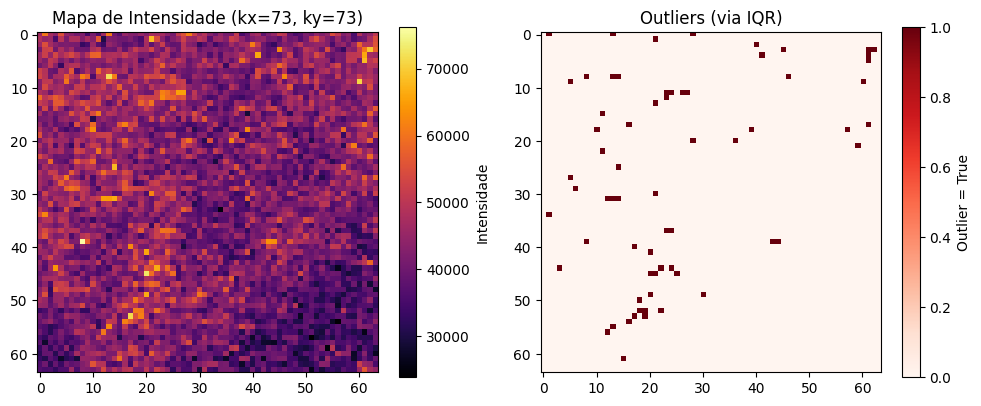

In [26]:
# Extrai o mapa de intensidade para o ponto de difração (kx=73, ky=73)
intensity_map = datacube.data[:, :, 73, 73]

# Cálculo dos quartis e IQR
q1 = np.percentile(intensity_map, 25)
q3 = np.percentile(intensity_map, 75)
iqr = q3 - q1

# Limite superior para outliers
threshold = q3 + 1.5 * iqr

# Máscara de outliers
outliers = intensity_map > threshold

# Visualização
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(intensity_map, cmap='inferno')
plt.title("Mapa de Intensidade (kx=73, ky=73)")
plt.colorbar(label="Intensidade")

plt.subplot(1, 2, 2)
plt.imshow(outliers, cmap='Reds')
plt.title("Outliers (via IQR)")
plt.colorbar(label="Outlier = True")

plt.tight_layout()
plt.show()

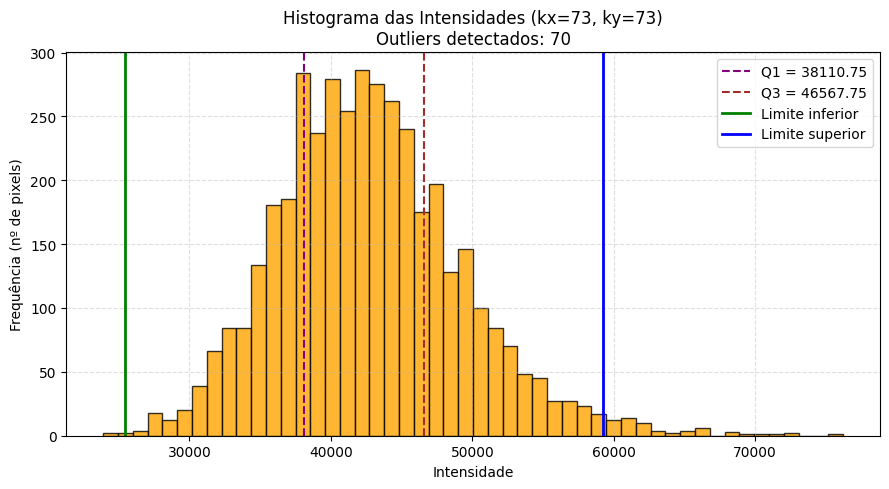

In [27]:
# Extrai o mapa de intensidade no ponto (kx=73, ky=73)
intensity_map = datacube.data[:, :, 73, 73]

# Transforma o mapa 2D em vetor 1D para análise estatística
values = intensity_map.flatten()

# Cálculo dos quartis e IQR
q1 = np.percentile(values, 25)
q3 = np.percentile(values, 75)
iqr = q3 - q1

# Limiares de outliers
threshold_low = q1 - 1.5 * iqr
threshold_high = q3 + 1.5 * iqr

# Máscara de outliers
outliers = (values < threshold_low) | (values > threshold_high)
num_outliers = np.sum(outliers)

# Plot do histograma
plt.figure(figsize=(9, 5))
plt.hist(values, bins=50, color='orange', alpha=0.8, edgecolor='black')

# Linhas verticais: Q1, Q3, e limiares
plt.axvline(q1, color='purple', linestyle='--', linewidth=1.5, label=f'Q1 = {q1:.2f}')
plt.axvline(q3, color='brown', linestyle='--', linewidth=1.5, label=f'Q3 = {q3:.2f}')
plt.axvline(threshold_low, color='green', linestyle='-', linewidth=2, label=f'Limite inferior')
plt.axvline(threshold_high, color='blue', linestyle='-', linewidth=2, label=f'Limite superior')

# Personalização
plt.title(f"Histograma das Intensidades (kx=73, ky=73)\nOutliers detectados: {num_outliers}")
plt.xlabel("Intensidade")
plt.ylabel("Frequência (nº de pixels)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

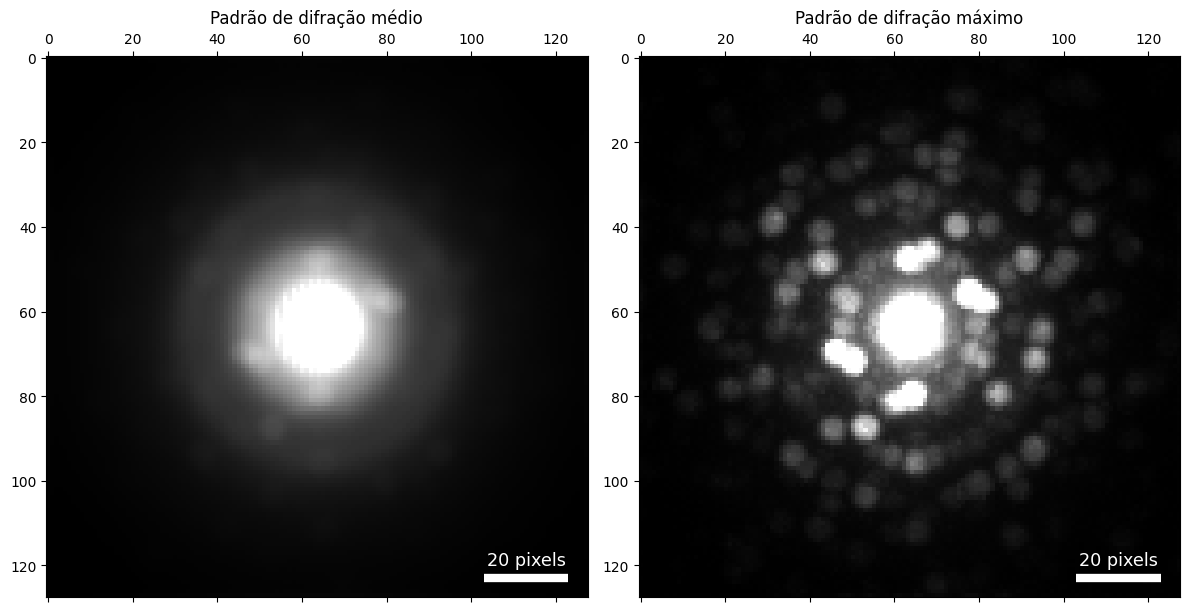

In [28]:
# Cheque padrão de difração médio e máximo
dp_mean, dp_max = [datacube.get_dp_mean(), datacube.get_dp_max()]
py4DSTEM.show([dp_mean, dp_max], title=['Padrão de difração médio', 'Padrão de difração máximo'])

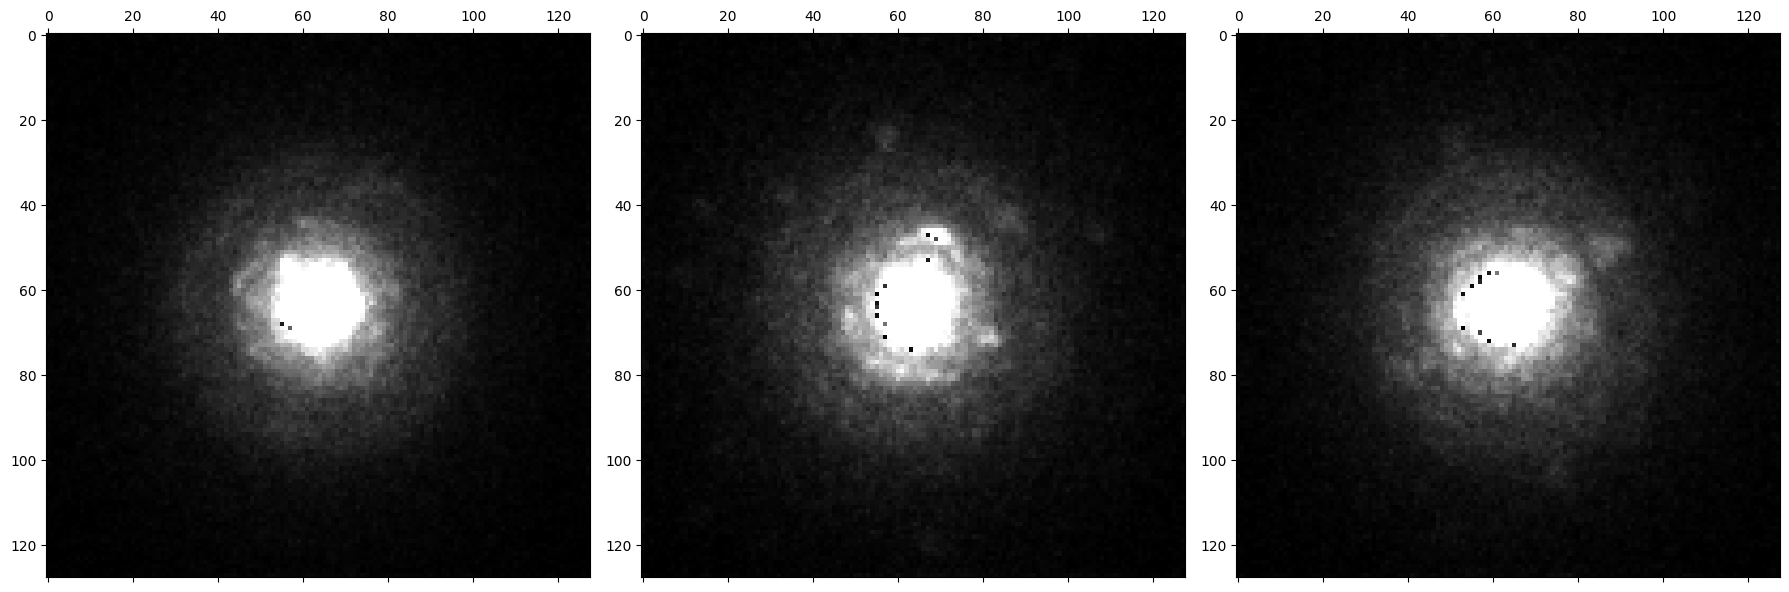

In [29]:
import py4DSTEM.visualize

# Escolher 3 posições aleatórias para escaneamento (rxs, rys)
rxs = [np.random.randint(0, datacube.data.shape[0]) for _ in range(3)]
rys = [np.random.randint(0, datacube.data.shape[1]) for _ in range(3)]

# Função para acessar o padrão de difração em cada posição
get_ar = lambda i: datacube.data[rxs[i], rys[i], :, :]

# Exibir a grade de imagens com 1 linha e 3 colunas (apenas 3 imagens)
py4DSTEM.visualize.show_image_grid(get_ar=get_ar, H=1, W=3)

Número de cold pixels:  2


invalid value encountered in log


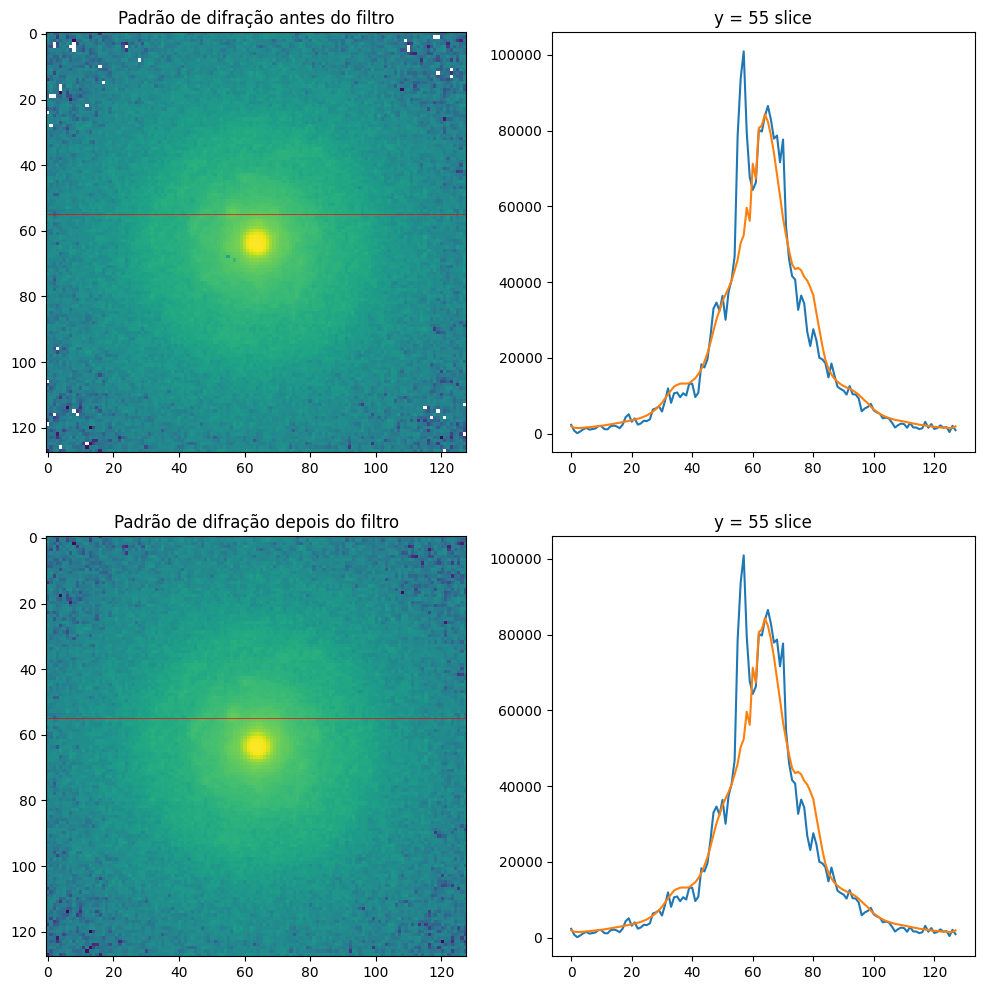

In [30]:
# Defina a função para filtrar dead & cold pixels (mediana local)
index = 0

rx, ry = rxs[index], rys[index]
data = np.copy(datacube[rx,ry])

def filter_cold_pixels(dp, neighborhood_size = 3, threshold = 0.5, crop = 35):

    dp[np.isnan(dp) | (dp < 0)] = 1000 # baseline para tais pixels
    cold_pixel_count = 0

    for i in range(crop, dp.shape[0]-crop):
        for j in range(crop, dp.shape[1]-crop):

                    # Definindo a máscara nas bordas do dp.
                    i_start = max(0, i - neighborhood_size // 2)
                    i_end = min(dp.shape[0], i + neighborhood_size // 2 + 1)
                    j_start = max(0, j - neighborhood_size // 2)
                    j_end = min(dp.shape[1], j + neighborhood_size // 2 + 1)

                    # Definindo a vizinhança
                    neighborhood = dp[i_start:i_end, j_start:j_end]
                    neighborhood = np.delete(neighborhood, np.argmin(neighborhood)) # Melhora região com cold pixels vizinhos
                    neighborhood_median = np.median(neighborhood)

                    # Substituindo cold pixels pela mediana local
                    if dp[i,j] < neighborhood_median * threshold:
                        dp[i,j] = neighborhood_median
                        cold_pixel_count += 1
    return(cold_pixel_count)

n = filter_cold_pixels(data)
print('Número de cold pixels: ', n)

y_line = 55 # Escolha y line para verificação

fig, ax = plt.subplots(2,2, figsize = (12,12))
ax[0,0].imshow(np.log(datacube[rx,ry]), interpolation = 'nearest')
ax[0,0].axhline(y = y_line, color = 'red', linewidth = 0.5)
ax[0,1].plot(datacube[rx,ry][y_line, :])
ax[0,1].plot(dp_mean[y_line, :])
ax[0,1].set_title('y = {} slice'.format(y_line))
ax[0,0].set_title('Padrão de difração antes do filtro')
ax[1,0].imshow(np.log(data), interpolation = 'nearest')
ax[1,0].axhline(y = y_line, color = 'red', linewidth = 0.5)
ax[1,1].plot(data[y_line, :])
ax[1,1].plot(dp_mean[y_line, :])
ax[1,1].set_title('y = {} slice'.format(y_line))
ax[1,0].set_title('Padrão de difração depois do filtro');

In [31]:
# # Aplicando a função a todo o datacube
from tqdm import tqdm

filtered_data = np.copy(datacube.data)

for i in tqdm(range(datacube.Rshape[0])):
    for j in range(datacube.Rshape[1]):
        filter_cold_pixels(filtered_data[i, j])

100%|██████████| 64/64 [12:10<00:00, 11.41s/it]


In [32]:
import h5py

# Salvar o array 4D em um arquivo HDF5
with h5py.File('filtered_data.h5', 'w') as f:
    f.create_dataset('filtered_data', data=filtered_data, compression='gzip')

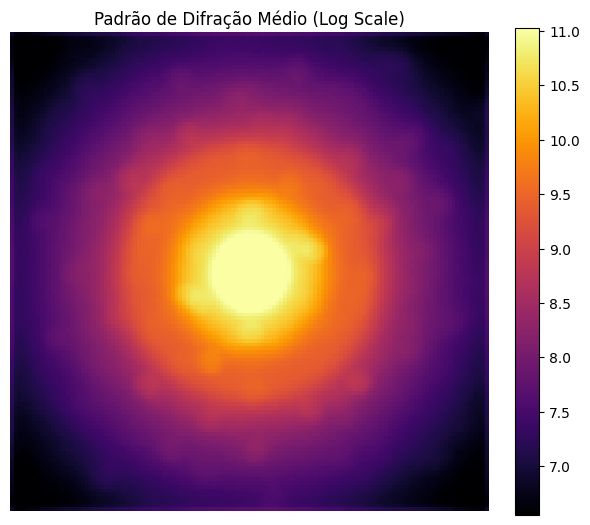

In [33]:
# Carrega os dados do arquivo HDF5
with h5py.File('filtered_data.h5', 'r') as f:
    data = f['filtered_data'][:]  # (Nx, Ny, H, W)

# Calcula o padrão de difração médio
dp_mean = np.mean(data, axis=(0, 1))

# Aplica log para melhorar contraste
dp_log = np.log(dp_mean + 1e-3)

# Visualização com contraste ajustado manualmente
plt.figure(figsize=(6, 6))
im = plt.imshow(dp_log, cmap='inferno', vmin=np.percentile(dp_log, 2), vmax=np.percentile(dp_log, 98))
plt.title("Padrão de Difração Médio (Log Scale)")
plt.axis('off')
plt.colorbar(im, fraction=0.046)
plt.tight_layout()
plt.show()

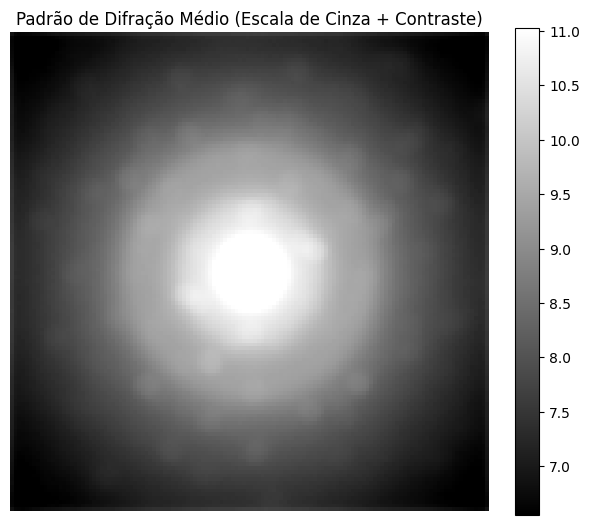

In [34]:
# Carrega os dados
with h5py.File('filtered_data.h5', 'r') as f:
    data = f['filtered_data'][:]  # (Nx, Ny, H, W)

# Calcula padrão médio
dp_mean = np.mean(data, axis=(0, 1))

# Aplica log para contraste
dp_log = np.log(dp_mean + 1e-3)

# Define limites de exibição com percentis (remove outliers)
vmin = np.percentile(dp_log, 2)
vmax = np.percentile(dp_log, 98)

# Plot com contraste ajustado
plt.figure(figsize=(6, 6))
im = plt.imshow(dp_log, cmap='gray', vmin=vmin, vmax=vmax)
plt.title("Padrão de Difração Médio (Escala de Cinza + Contraste)")
plt.axis('off')
plt.colorbar(im, fraction=0.046)
plt.tight_layout()
plt.show()